<a href="https://colab.research.google.com/github/LeonieFetzer/DHBW_kNN_Gruppe-3/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datensatz

In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
# Datensatz importieren
from google.colab import files
uploaded = files.upload()

import pandas as pd
telefonkunden = pd.read_csv('telefonkunden.csv')

telefonkunden.head()
telefonkunden.shape

Saving telefonkunden.csv to telefonkunden (1).csv


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


(1000, 12)

In [19]:
print("Anzahl Zeilen, Spalten:", telefonkunden.shape)
print("Spaltennamen:", telefonkunden.columns.tolist())
print(telefonkunden.head(5))  # die ersten 5 Zeilen ausgeben

# Prüfen auf fehlende Werte
print("\nFehlende Werte pro Spalte:\n", telefonkunden.isnull().sum())

# Separieren von Features (X) und Zielvariable (y)
X = telefonkunden.drop('custcat', axis=1)   # alle Spalten außer 'custcat' als Features; .drop löscht Spalten
y = telefonkunden['custcat']               # Zielvariable 'custcat'

Anzahl Zeilen, Spalten: (1000, 12)
Spaltennamen: ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  

Fehlende Werte pro Spalte:
 region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64


# Aufteilung Datensatz

In [20]:
from sklearn.model_selection import train_test_split

# Datensatz aufteilen in 80% Training und 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Parameter der Daten ausgeben
print("Trainingsdaten:", X_train.shape, "Trainingslabels:", y_train.shape)
print("Testdaten:", X_test.shape, "Testlabels:", y_test.shape)

Trainingsdaten: (800, 11) Trainingslabels: (800,)
Testdaten: (200, 11) Testlabels: (200,)


# Support Vector Machines

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Daten skalieren
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modell trainieren
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Mit dem trainierten Modell werden die Zielwerte für Trainings- und Testdaten vorhergesagt
y_vorhersage_train = model.predict(X_train)
y_vorhersage_test  = model.predict(X_test)

# Berechnung der Accuracy (Anteil korrekt klassifizierter Beispiele)
train_genauigkeit = accuracy_score(y_train, y_vorhersage_train)
test_genauigkeit  = accuracy_score(y_test,  y_vorhersage_test)

# Cross-Validation (5-fold)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
cv_mean   = cv_scores.mean()
cv_std    = cv_scores.std()

print(f"Cross-Validation Accuracy (Mittelwert): {cv_mean:.4f}")
print(f"Genauigkeit auf Trainingsdaten: {train_genauigkeit:.4f}")
print(f"Genauigkeit auf Testdaten: {test_genauigkeit:.4f}")

Cross-Validation Accuracy (Mittelwert): 0.4037
Genauigkeit auf Trainingsdaten: 0.4263
Genauigkeit auf Testdaten: 0.3950


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definieren des Parameter-Rasters für GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Erstellen des GridSearchCV-Objekts
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

# GridSearchCV auf Trainingsdaten anwenden
grid_search.fit(X_train, y_train)

print("Bester gefundener Parameter: ", grid_search.best_params_)
print("Beste cross-validation accuracy: ", grid_search.best_score_)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy')

Bester gefundener Parameter:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Beste cross-validation accuracy:  0.41500000000000004


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Bestes Modell aus GridSearchCV holen
best_model = grid_search.best_estimator_

# Cross-Validation Accuracy berechnen (5-fold)
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
cv_mean   = cv_scores.mean()

# Vorhersagen auf den Trainingsdaten
y_pred_train = best_model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)

# Vorhersagen auf den Testdaten
y_pred_best = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_best)

print("Ergebnisse des optimierten Modells:")
print(f"Genauigkeit auf Trainingsdaten: {train_acc:.4f}")
print(f"Genauigkeit auf Testdaten: {test_acc:.4f}")
print(f"Beste cross-validation accuracy: {cv_mean:.4f}")

Ergebnisse des optimierten Modells:
Genauigkeit auf Trainingsdaten: 0.4250
Genauigkeit auf Testdaten: 0.4000
Beste cross-validation accuracy: 0.4150


# Evaluation

Genauigkeit 0.4


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix Heatmap der SVM')

Text(0.5, 36.72222222222221, 'Vorausgesagter Service-Umfang')

Text(70.72222222222221, 0.5, 'Tatsächlicher Service-Umfang')

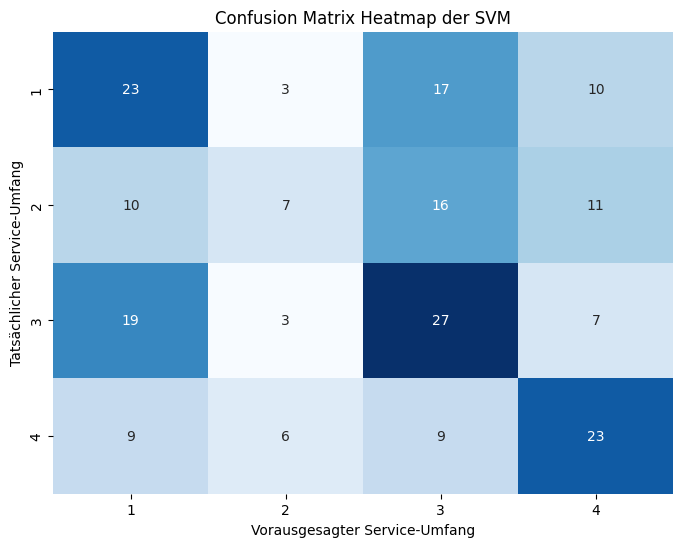

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

genauigkeit = accuracy_score(y_test, y_pred_best)
print(f'Genauigkeit {genauigkeit}')

# Confusion-Matrix berechnen
matrix = confusion_matrix(y_test, y_pred_best)
labels = sorted(y.unique())

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix Heatmap der SVM')
plt.xlabel('Vorausgesagter Service-Umfang')
plt.ylabel('Tatsächlicher Service-Umfang')
plt.show()

<Figure size 800x600 with 0 Axes>

<BarContainer object of 4 artists>

Text(0.5, 0, 'Klasse')

Text(0, 0.5, 'F1-Score')

Text(0.5, 1.0, 'F1-Score pro Klasse – SVM ')

(0.0, 1.0)

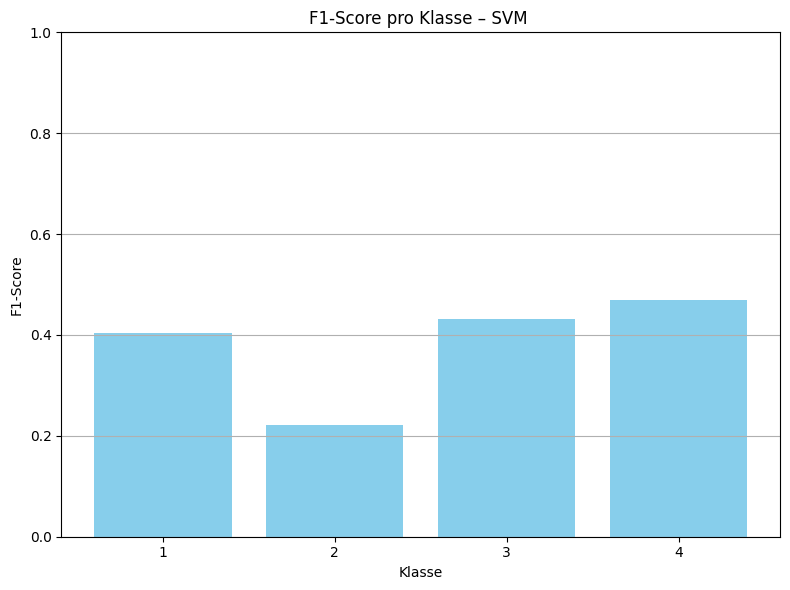

In [27]:
from sklearn.metrics import classification_report
# Klassifikationsbericht als Dictionary
report = classification_report(y_test, y_pred_best, output_dict=True)

# F1-Score extrahieren
f1_per_class = {label: metrics['f1-score'] for label, metrics in report.items() if label.isdigit()}

# Balkendiagramm
plt.figure(figsize=(8,6))
plt.bar(f1_per_class.keys(), f1_per_class.values(), color='skyblue')
plt.xlabel('Klasse')
plt.ylabel('F1-Score')
plt.title('F1-Score pro Klasse – SVM ')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Axes: >

Text(0.5, 1.0, 'Feature Importance – SVM')

Text(0.5, 0, 'Bedeutung (mittlerer Einfluss)')

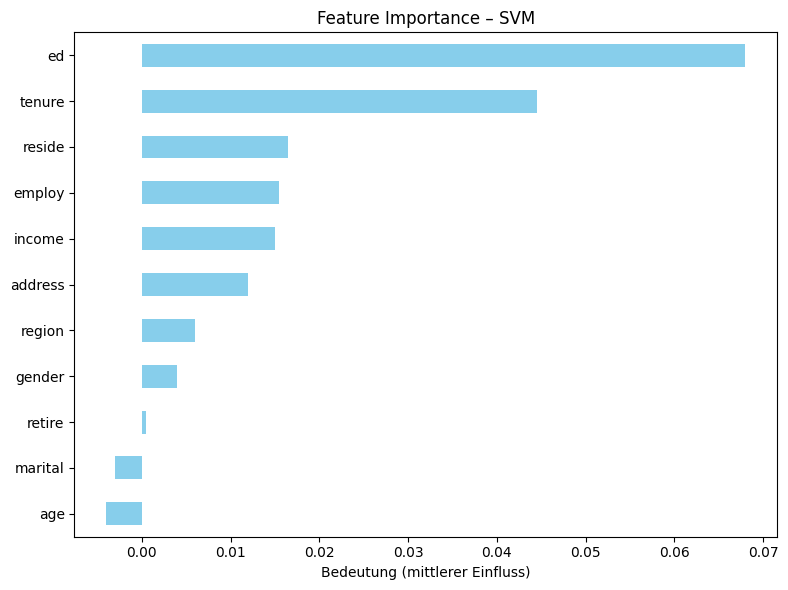

In [28]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
# Wichtigkeit der Variablen
importances = pd.Series(result.importances_mean, index=X.columns).sort_values()

# Balkendiagramm
importances.plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title("Feature Importance – SVM")
plt.xlabel("Bedeutung (mittlerer Einfluss)")
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.3770491803278688, 0.4339622641509434, 'Klasse 1')

Text(0.3684210526315789, 0.1590909090909091, 'Klasse 2')

Text(0.391304347826087, 0.48214285714285715, 'Klasse 3')

Text(0.45098039215686275, 0.48936170212765956, 'Klasse 4')

Text(0.5, 0, 'Precision')

Text(0, 0.5, 'Recall')

Text(0.5, 1.0, 'Precision vs. Recall pro Klasse – SVM')

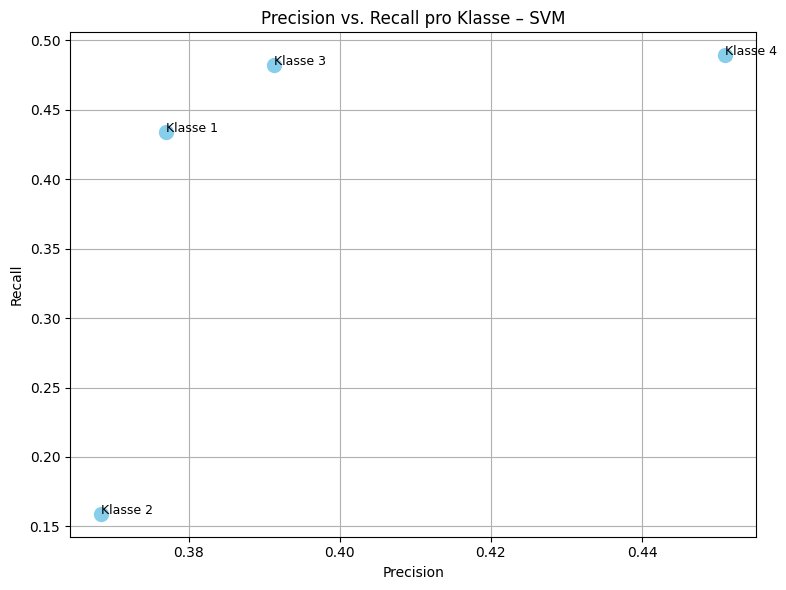

In [29]:
# Precision und Recall pro Klasse extrahieren
precision_per_class = {label: metrics['precision'] for label, metrics in report.items() if label.isdigit()}
recall_per_class = {label: metrics['recall'] for label, metrics in report.items() if label.isdigit()}

# Plot erstellen
plt.figure(figsize=(8,6))
plt.scatter(precision_per_class.values(), recall_per_class.values(), s=100, c='skyblue')

# Klassenlabels anzeigen
for label in precision_per_class:
    plt.text(precision_per_class[label], recall_per_class[label], f'Klasse {label}', fontsize=9)

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs. Recall pro Klasse – SVM')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Precision, Recall, F1-Score pro Klasse – SVM ')

Text(0.5, 36.72222222222221, 'Metrik')

Text(95.72222222222221, 0.5, 'Klasse')

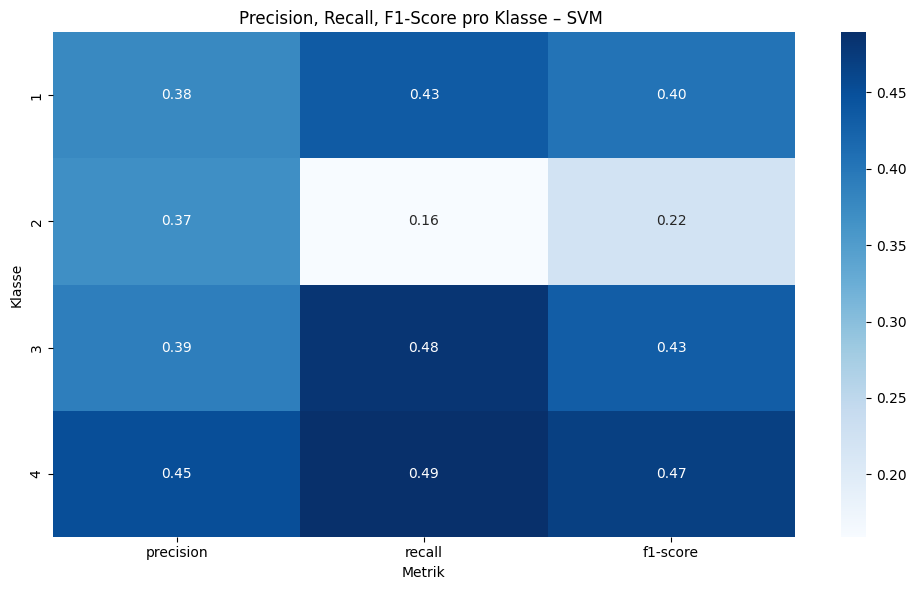

In [30]:
# Nur numerische Klassen extrahieren
metrics_df = pd.DataFrame({label: metrics for label, metrics in report.items() if label.isdigit()}).T

metrics_df = metrics_df[['precision', 'recall', 'f1-score']]

# Heatmap plotten
plt.figure(figsize=(10,6))
sns.heatmap(metrics_df, annot=True, cmap='Blues', fmt=".2f")
plt.title("Precision, Recall, F1-Score pro Klasse – SVM ")
plt.xlabel("Metrik")
plt.ylabel("Klasse")
plt.tight_layout()
plt.show()